## A certain university wants to understand the relationship between students’ SAT scores and their GPA. Build a Simple Linear Regression model with GPA as the target variable and record the RMSE and correlation coefficient values for different models

In [1]:
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv(r"C:\Users\yavar\DS_Assignments\22.Simple Linear Regression\SAT_GPA.csv")
data2=df.copy()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT_Scores  200 non-null    int64  
 1   GPA         200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [54]:
df.rename(columns={'SAT_Scores':'sat','GPA':'gpa'}, inplace=True)





In [55]:
df["gpa"]

0      2.3
1      2.4
2      3.5
3      2.8
4      2.6
      ... 
195    3.1
196    2.5
197    3.5
198    3.9
199    2.4
Name: gpa, Length: 200, dtype: float64

In [56]:
df["gpa"]

0      2.3
1      2.4
2      3.5
3      2.8
4      2.6
      ... 
195    3.1
196    2.5
197    3.5
198    3.9
199    2.4
Name: gpa, Length: 200, dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sat     200 non-null    int64  
 1   gpa     200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [58]:
df.describe()

,sat,gpa
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


In [59]:
df.isnull().sum()

sat    0
gpa    0
dtype: int64

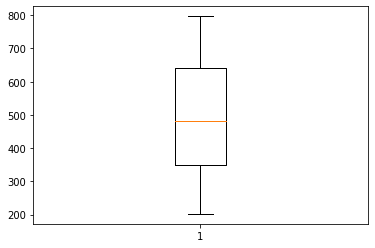

In [60]:
plt.boxplot(df['sat']);

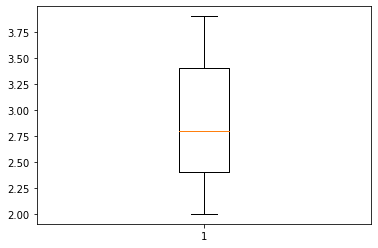

In [61]:
plt.boxplot(df['gpa']);

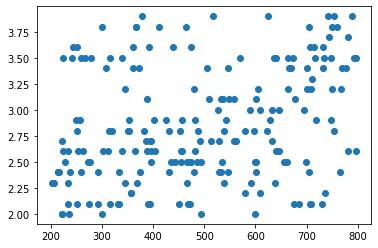

In [62]:
plt.scatter(df['sat'],df['gpa']);

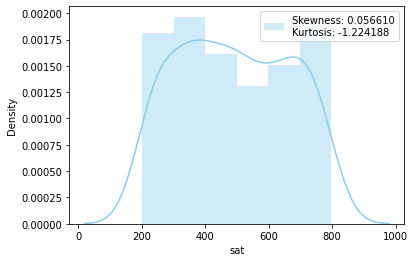

In [63]:
sns.distplot( df['sat'] , color="skyblue",label = "Skewness: %f" % df['sat'].skew() + "\n" + "Kurtosis: %f" % df['sat'].kurt())
plt.legend();

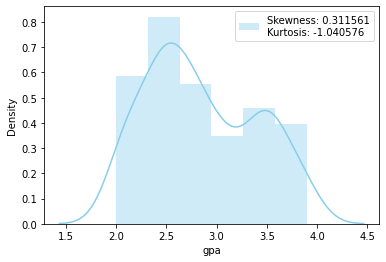

In [64]:
sns.distplot( df['gpa'] , color="skyblue",label = "Skewness: %f" % df['gpa'].skew() + "\n" + "Kurtosis: %f" % df['gpa'].kurt())
plt.legend();

In [65]:
corre = np.corrcoef(df['sat'],df['gpa'])
print(corre)

[[1.         0.29353828]
 [0.29353828 1.        ]]


In [66]:
cov = np.cov(df['sat'],df['gpa'])
print(cov)

[[3.05878532e+04 2.77777940e+01]
 [2.77777940e+01 2.92763568e-01]]


In [71]:
x=np.array(df['sat']).reshape(-1,1)
y=np.array(df['gpa']).reshape(-1,1)

## Simple Linear Regression

In [73]:
model = LinearRegression()
model.fit(x,y)

print(model.score(x, y))

0.08616471916950963


In [75]:
regression_model_mse = mean_squared_error(x,y)

MSE = math.sqrt(regression_model_mse)
print("MSE             : ", MSE)
Rsqr = model.score(x,y)
print("R squared value :",Rsqr)

MSE             :  519.0975803738638
R squared value : 0.08616471916950963


In [76]:
print("Coefficient b0 :",model.coef_[0])
print("Intercept b1   :",model.intercept_[0])

Coefficient b0 : [0.00090813]
Intercept b1   : 2.4028718310256174


In [77]:
y_predicted = model.predict(x)
y_actual = y
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                           #get the ^

print(rmse(y_predicted,y_actual))

0.5159457227723684


In [78]:
import statsmodels.formula.api as smf

model = smf.ols('gpa ~ sat',data = df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.46e-05
Time:                        17:33:57   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.000       2.187       2.619
sat            0.0009      0.000      4.321      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.558
Skew:                           0.317   Prob(JB):                       0.0228
Kurtosis:                       2.290   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The result: 0.086 indicates a very bad relationship, and tells us that this data set is not suitable for linear regression